# Data Preprocessing

In [1]:
import os
import pandas as pd
import torch

## Cleanse raw dataset

Dataset: [Turkey and Syria Earthquake Tweets](https://www.kaggle.com/datasets/swaptr/turkey-earthquake-tweets)

"For the purpose of this study, the authors used the Turkey and Syria Earthquake Tweets dataset, which is available on Kaggle [35]. The dataset contains 472,399 tweets relating to the earthquake that struck Turkey and Syria on 6 February 2023, and ends with tweets on 21 February 2023. The dataset captures real-time, user-generated tweets reflecting interactions, public responses, and reactions during the event. All tweets included a language metadata field. The dataset was filtered to include only English-language tweets, yielding 189,626 tweets for this analysis (the filtering was conducted via the provided language label)"

### Load data

- "Filtering English language: After this filtering, 189,626 tweets out of 472,399 tweets were filtered as English text." 
- Simply used the `tweets_en.csv` data.

In [2]:
df = pd.read_csv("./data/turkey_syria_earthquake_tweets/tweets_en.csv")
print(f"N = {len(df)}")
df.head()

N = 189626


,Unnamed: 0,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,coordinates,place,source
0,1,2023-02-21 03:29:07+00:00,New search &amp; rescue work is in progress in...,"['Hatay', 'earthquakes', 'Türkiye', 'TurkiyeQu...",1.0,0.0,5697.0,True,en,NaN,NaN,Twitter Web App
1,2,2023-02-21 03:29:04+00:00,Can't imagine those who still haven't recovere...,"['Turkey', 'earthquake', 'turkeyearthquake2023...",0.0,0.0,1.0,False,en,NaN,NaN,Twitter for Android
2,3,2023-02-21 03:28:06+00:00,its a highkey sign for all of us to ponder ove...,"['turkeyearthquake2023', 'earthquake', 'Syria']",0.0,0.0,3.0,False,en,NaN,NaN,Twitter for Android
3,5,2023-02-21 03:27:27+00:00,"See how strong was the #Earthquake of Feb 20, ...","['Earthquake', 'Hatay', 'Turkey', 'turkeyearth...",0.0,0.0,21836.0,True,en,NaN,NaN,Twitter for Android
4,6,2023-02-21 03:27:11+00:00,More difficult news today on top of struggles ...,"['Türkiye', 'Syria', 'earthquake', 'Canadians']",1.0,0.0,675.0,False,en,NaN,NaN,Twitter for iPhone


In [3]:
print(df.loc[0, 'content'])

New search &amp; rescue work is in progress in #Hatay after two more #earthquakes hit #Türkiye’s southeastern province.  #TurkiyeQuakes #Turkey-#Syria  #Earthquake #turkeyearthquake2023  https://t.co/sd4WHByiQs


### Text lowercasing

"All tweets were converted to lowercase; according to Hickman et al. [37], lowercasing tends to be beneficial because it reduces data dimensionality, thereby increasing statistical power, and usually does not reduce validity."

In [4]:
df['content'] = df['content'].str.lower()
print(df.loc[0, 'content'])

new search &amp; rescue work is in progress in #hatay after two more #earthquakes hit #türkiye’s southeastern province.  #turkiyequakes #turkey-#syria  #earthquake #turkeyearthquake2023  https://t.co/sd4whbyiqs


### Stop word removal

- Stop word removal was useful in traditional NLP models, but not so effective for DL models. 
- The original paper compared the traditional NLP models with DL models so they used it. 
  - "common English (function) words such as “and”, “is”, “I”, “am”, “what”, “of”, etc. were removed by using the Natural Language Toolkit (NLTK). Stop word removal has the advantages of reducing the size of the stored dataset and improving the overall efficiency and effectiveness of the analysis [38]."

- However, **we are only training DL models in our analysis so we are not applying it**.

In [28]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# NLTK_LOCAL_PATH = "./nltk_data"
# os.makedirs(NLTK_LOCAL_PATH, exist_ok=True)
# nltk.data.path.append(NLTK_LOCAL_PATH)
# # nltk.download('stopwords', download_dir=NLTK_LOCAL_PATH)
# # nltk.download('punkt', download_dir=NLTK_LOCAL_PATH)

# # Get English stop words
# stop_words = set(stopwords.words('english'))

# # Function to remove stop words from text
# def remove_stopwords(text):
#     if pd.isna(text):
#         return text
#     # Tokenize the text
#     words = word_tokenize(text)
#     # Remove stop words and return as string
#     filtered_words = [word for word in words if word.lower() not in stop_words]
#     return ' '.join(filtered_words)

# df['content'] = df['content'].apply(remove_stopwords)
# print(df.loc[0, 'content'])

### URLs removal

"All URLs were removed from tweets, since the text of URL strings does not necessarily convey any relevant information,  and can therefore be removed [39]."

In [29]:
df['content'] = df['content'].str.replace(r'http\S+', '', regex=True)
print(df.loc[0, 'content'])

new search &amp; rescue work is in progress in #hatay after two more #earthquakes hit #türkiye’s southeastern province.  #turkiyequakes #turkey-#syria  #earthquake #turkeyearthquake2023  


### Duplicate removal

"All duplicate tweets were removed to eliminate redundancy and possible skewing of the results."

In [30]:
print(f"N = {len(df)}")
df = df.drop_duplicates(subset='content', keep='first')
print(f"N = {len(df)}")

N = 189626
N = 180915


### Remove unncessary columns

In [31]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df.head()

,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,coordinates,place,source
0,2023-02-21 03:29:07+00:00,new search &amp; rescue work is in progress in...,"['Hatay', 'earthquakes', 'Türkiye', 'TurkiyeQu...",1.0,0.0,5697.0,True,en,NaN,NaN,Twitter Web App
1,2023-02-21 03:29:04+00:00,can't imagine those who still haven't recovere...,"['Turkey', 'earthquake', 'turkeyearthquake2023...",0.0,0.0,1.0,False,en,NaN,NaN,Twitter for Android
2,2023-02-21 03:28:06+00:00,its a highkey sign for all of us to ponder ove...,"['turkeyearthquake2023', 'earthquake', 'Syria']",0.0,0.0,3.0,False,en,NaN,NaN,Twitter for Android
3,2023-02-21 03:27:27+00:00,"see how strong was the #earthquake of feb 20, ...","['Earthquake', 'Hatay', 'Turkey', 'turkeyearth...",0.0,0.0,21836.0,True,en,NaN,NaN,Twitter for Android
4,2023-02-21 03:27:11+00:00,more difficult news today on top of struggles ...,"['Türkiye', 'Syria', 'earthquake', 'Canadians']",1.0,0.0,675.0,False,en,NaN,NaN,Twitter for iPhone


#### Exclude location info

"Location information was excluded from all subsequent modelling because 96% of the tweets lacked geolocation."

In [32]:
df = df.drop(columns=['coordinates', 'place'], errors='ignore')
df.head()

,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,source
0,2023-02-21 03:29:07+00:00,new search &amp; rescue work is in progress in...,"['Hatay', 'earthquakes', 'Türkiye', 'TurkiyeQu...",1.0,0.0,5697.0,True,en,Twitter Web App
1,2023-02-21 03:29:04+00:00,can't imagine those who still haven't recovere...,"['Turkey', 'earthquake', 'turkeyearthquake2023...",0.0,0.0,1.0,False,en,Twitter for Android
2,2023-02-21 03:28:06+00:00,its a highkey sign for all of us to ponder ove...,"['turkeyearthquake2023', 'earthquake', 'Syria']",0.0,0.0,3.0,False,en,Twitter for Android
3,2023-02-21 03:27:27+00:00,"see how strong was the #earthquake of feb 20, ...","['Earthquake', 'Hatay', 'Turkey', 'turkeyearth...",0.0,0.0,21836.0,True,en,Twitter for Android
4,2023-02-21 03:27:11+00:00,more difficult news today on top of struggles ...,"['Türkiye', 'Syria', 'earthquake', 'Canadians']",1.0,0.0,675.0,False,en,Twitter for iPhone


## Sentiment Analysis

- "It should be noted that this dataset did not come with sentiment annotations. Therefore, sentiment labels were assigned using a pre-trained BERT sentiment model, rather than manual human annotations."
- use pre-trained transformer-based `BERT` model to add a sentiment score fore each sentence

"Sentiment analysis was performed utilizing a pre-trained transformer-based BERT model, specifically the `nlptown/bert-base-multilingual-uncased-sentiment`. This model is a fine-tuned version of `bert-base-multilingual-uncased`, which is optimized for sentiment analysis across six languages: English, Dutch, German, French, Spanish and Italian [40]."

#### Reference
[40] Lakhanpal, S.; Gupta, A.; Agrawal, R. Leveraging Explainable AI to Analyze Researchers’ Aspect-Based Sentiment About ChatGPT. In Proceedings of the 15th International Conference on Intelligent Human Computer Interaction (IHCI 2023), Daegu, Republic of Korea, 8–10 November 2023; pp. 281–290.

In [33]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
save_dir = "./local_bert_multilingual"

# Download once
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# tokenizer.save_pretrained(save_dir)
# model = AutoModelForSequenceClassification.from_pretrained(model_name)
# model.save_pretrained(save_dir)

tokenizer = AutoTokenizer.from_pretrained(save_dir)
model = AutoModelForSequenceClassification.from_pretrained(save_dir)
_ = model.eval()

"Tweets were tokenized using the AutoTokenizer from HuggingFace Transformers, truncated to a maximum length of 512 tokens [41]. The model predicted sentiment scores across five classes representing very negative to very positive sentiments. These categorical outputs were then converted to a continuous polarity scale ranging from −1 (strongly negative) to +1 (strongly positive) to facilitate the temporal analysis of sentiment fluctuations."

- polarity = (star_rating - 3) / 2
- discrete star_rating  = \[0,1,2,3,4\] => continuous polarity = (-1.0, -0.5, 0.0, 0.5, 1.0)

#### Reference
[41] Hussain, Z.; Binz, M.; Mata, R.; Wulff, D.U. A tutorial on open-source large language models for behavioral science. Behav. Res. 2024, 56, 8214–8237.

In [34]:
inputs = df['content'].tolist()
print(f"N = {len(inputs)}")
batch_size = 32
print(f"batch_size: {batch_size}")
print(f"{len(inputs)//batch_size} batchs + {len(inputs)%batch_size}")

N = 180915
batch_size: 32
5653 batchs + 19


In [35]:
polarity_scores_path = "./data/turkey_syria_earthquake_tweets/polarity_scores.pt"
outputs_dir = "./data/turkey_syria_earthquake_tweets/polarity_batches"
os.makedirs(outputs_dir, exist_ok=True)

if not os.path.exists(polarity_scores_path):
    all_polarities = []
    
    num_inputs = len(inputs)
    num_batches = (num_inputs + batch_size - 1) // batch_size
    
    for batch_idx, start_idx in enumerate(range(0, num_inputs, batch_size)):
        end_idx = min(start_idx + batch_size, num_inputs)
        batch_path = os.path.join(outputs_dir, f"{int(batch_idx)}.pt")
    
        if os.path.exists(batch_path):
            print(f"[skip] {batch_idx+1}/{num_batches} ({start_idx}~{end_idx}) already exists")
            continue
        print(f"[compute] {batch_idx+1}/{num_batches}: {start_idx}~{end_idx}")
    
        batch = inputs[start_idx:end_idx]
        model_inputs = tokenizer(batch, padding=True, truncation=True, max_length=512, return_tensors="pt")
        
        # Call BERT and get predicted labels
        with torch.no_grad():
            outputs = model(**model_inputs)
    
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=-1)
        predicted_labels = torch.argmax(probabilities, dim=-1)
    
        # Convert to polarity scale as stated in the paper
        star_ratings = predicted_labels + 1
        polarity_scores = (star_ratings - 3) / 2.0
        all_polarities.append(polarity_scores)
    
        # save each batch
        torch.save(polarity_scores, batch_path)
        print(f"saved: {batch_path}")
    
    polarity_scores = torch.cat(all_polarities, dim=0)
    torch.save(polarity_scores, polarity_scores_path)
    print(f"saved to {polarity_scores_path}")
else:
    print(f"loading {polarity_scores_path}")
    polarity_scores = torch.load(polarity_scores_path, weights_only=True)

print(polarity_scores.shape)
assert len(polarity_scores) == len(inputs)

loading ./data/turkey_syria_earthquake_tweets/polarity_scores.pt
torch.Size([180915])


Assign sentiment polarity (-1 ~ +1) to each tweet & add normalized polarity.

In [36]:
df['sentiment_polarity'] = polarity_scores.numpy()
print(f"number of NA data: {df['sentiment_polarity'].isna().sum()}")
if df['sentiment_polarity'].isna().sum() > 0:
    pol = pol.interpolate(limit_direction="both")
else:
    print("interpolation not needed")

number of NA data: 0
interpolation not needed


### Normalization

"Sentiment polarity scores were normalized using MinMax scaling to the [0,1] range."

In [29]:
# clean and normalize polarity data

pol = df['sentiment_polarity'].astype(float).copy()

# normalize
pol = df['sentiment_polarity'].astype(float).copy()
pol_mean, pol_std = pol.mean(), pol.std() if pol.std() > 0 else 1.0
df['sentiment_polarity_norm'] = (pol - pol_mean) / pol_std

# MinMax scaling
pol_min = pol.min()
pol_max = pol.max()
range_val = pol_max - pol_min if pol_max - pol_min > 0 else 1.0
df['sentiment_polarity_min_max'] = (pol - pol_min) / range_val

df.head()

,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,source,sentiment_polarity,sentiment_polarity_norm,sentiment_polarity_min_max
0,2023-02-21 03:29:07+00:00,new search &amp; rescue work is in progress in...,"['Hatay', 'earthquakes', 'Türkiye', 'TurkiyeQu...",1.0,0.0,5697.0,True,en,Twitter Web App,0.5,1.011136,0.75
1,2023-02-21 03:29:04+00:00,can't imagine those who still haven't recovere...,"['Turkey', 'earthquake', 'turkeyearthquake2023...",0.0,0.0,1.0,False,en,Twitter for Android,-1.0,-0.689723,0.00
2,2023-02-21 03:28:06+00:00,its a highkey sign for all of us to ponder ove...,"['turkeyearthquake2023', 'earthquake', 'Syria']",0.0,0.0,3.0,False,en,Twitter for Android,1.0,1.578089,1.00
3,2023-02-21 03:27:27+00:00,"see how strong was the #earthquake of feb 20, ...","['Earthquake', 'Hatay', 'Turkey', 'turkeyearth...",0.0,0.0,21836.0,True,en,Twitter for Android,-1.0,-0.689723,0.00
4,2023-02-21 03:27:11+00:00,more difficult news today on top of struggles ...,"['Türkiye', 'Syria', 'earthquake', 'Canadians']",1.0,0.0,675.0,False,en,Twitter for iPhone,-0.5,-0.122770,0.25


## Save preprocessed data

In [31]:
output_path = "./data/turkey_syria_earthquake_tweets/preprocessed_data.csv"
df.to_csv(output_path, index=False)
print("Saved:", output_path)

Saved: ./data/turkey_syria_earthquake_tweets/preprocessed_data.csv


# Deep Learning

## Setup

In [19]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split

In [6]:
import random

SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

generator = torch.Generator()
_ = generator.manual_seed(SEED)

In [7]:
def load_data(past_to_future = True):
    output_path = "./data/turkey_syria_earthquake_tweets/preprocessed_data.csv"
    df = pd.read_csv(output_path)
    print(f"N = {len(df)}")

    if past_to_future:
        if df['date'].is_monotonic_decreasing:
            print("date is descending (future => past), reversing...")
            df = df.iloc[::-1].reset_index(drop=True) # df = df.sort_values("date").reset_index(drop=True)
        assert df['date'].is_monotonic_increasing

    return df

df = load_data()
df.head()

N = 180915
date is descending (future => past), reversing...


,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,source,sentiment_polarity,sentiment_polarity_norm,sentiment_polarity_min_max
0,2023-02-06 00:01:03+00:00,from istanbul to new york – discovering the la...,"['ottomanempire', 'ottoman', 'osman', 'osmanbe...",0.0,0.0,66.0,False,en,Twitter for Android,1.0,1.578089,1.0
1,2023-02-06 00:01:25+00:00,#earthquake (#sismo) m2.8 strikes 72 km ne of ...,"['Earthquake', 'sismo', 'Calama', 'Chile']",3.0,2.0,44544.0,False,en,emsc-csem,-1.0,-0.689723,0.0
2,2023-02-06 00:04:02+00:00,all they toys experimented in #syria for years...,"['Syria', 'Ukraine', 'February2023']",0.0,0.0,679.0,False,en,Twitter for iPhone,-1.0,-0.689723,0.0
3,2023-02-06 00:04:34+00:00,@kalllllenberger @jarrodjmorris the usa has it...,"['propaganda', 'Turkey']",0.0,0.0,157308.0,False,en,Twitter Web App,1.0,1.578089,1.0
4,2023-02-06 00:05:04+00:00,"usgs reports a m1.16 earthquake, 14km n of bor...",['earthquake'],2.0,2.0,29666.0,False,en,everyEarthquake,-1.0,-0.689723,0.0


## Anomaly Detection: Autoencoder

#### Implementation
- An autoencoder neural network was designed and trained to detect anomalies based on deviations in tweet sentiment patterns.
- The input data was structured into sequences of polarity scores.
- The autoencoder was implemented as a fully connected feedforward network with a three-layer encoder and symmetric decoder.
- The encoder consisted of a hidden layer with 64 neurons followed by a 16-neuron bottleneck, using rectified linear unit (ReLU) activations for encoding and decoding [42].
- Reconstruction errors (mean squared error between actual and reconstructed sequences) were calculated, and tweets with errors above the 95th percentile threshold were flagged as anomalies.

#### Common
- Both models were trained for 10 epochs using the Adam optimizer (learning rate was set to 0.001), with a batch size of 32 and mean squared error (MSE) loss.
- Sentiment polarity scores were normalized using MinMax scaling to the [0,1] range. The model’s output was a prediction of subsequent sentiment scores.
- Anomalies were identified when prediction errors exceeded a threshold set at the 95th percentile, highlighting sudden or extreme shifts (changes) in sentiment.

In [ ]:
# trained for 10 epochs using the Adam optimizer (learning rate was set to 0.001), with a batch size of 32 and mean squared error (MSE) loss.
num_epochs = 10
lr = 0.001 # 1e-3
batch_size = 32

# number of tweets in each sequence (not specified in the paper)
WINDOW_SIZE = 16
# WINDOW_SIZE = 16
# len(end_indices): 180900
# num anomalous sequences: 9045
# Epoch 10/10 - loss=0.000948

# WINDOW_SIZE = 320
# len(end_indices): 180596
# num anomalous sequences: 9030

# WINDOW_SIZE = 32
# len(end_indices): 180884
# num anomalous sequences: 9045
# Epoch 10/10 - loss=0.053952

HIDDEN_DIM = 64
BOTTLE_NECK_DIM = 16

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [15]:
# The input data was structured into sequences of polarity scores.
# Sentiment polarity scores were normalized using MinMax scaling to the [0,1] range. The model’s output was a prediction of subsequent sentiment scores.
def sequences_by_window(window_size):
    sentiment_polarity = df["sentiment_polarity_min_max"].to_numpy(dtype="float32")
    
    seqs = []
    end_indices = [] # index of the last tweet in each sequence (map errors to this tweet)
    for i in range(len(sentiment_polarity) - window_size + 1):
        seqs.append(sentiment_polarity[i : i + window_size])
        end_indices.append(i + window_size - 1)
    
    X = np.stack(seqs)
    end_indices = np.array(end_indices)

    print(f"N={len(df)}")
    print("X shape:", X.shape) # (num_sequences, WINDOW_SIZE)
    print("len(end_indices):", len(end_indices)) # [num_sequences]
        
    return X, end_indices

X, end_indices = sequences_by_window(WINDOW_SIZE)

N=180915
X shape: (180900, 16)
len(end_indices): 180900


In [16]:
# The autoencoder was implemented as a fully connected feedforward network with a three-layer encoder and symmetric decoder.
# The encoder consisted of a hidden layer with 64 neurons followed by a 16-neuron bottleneck, using rectified linear unit (ReLU) activations for encoding and decoding [42].

class Autoencoder(nn.Module):
    def __init__(self, input_dim = WINDOW_SIZE, hidden_dim = HIDDEN_DIM, bottleneck_dim = BOTTLE_NECK_DIM):
        super().__init__()

        # input_dim -> 64 -> 16
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, bottleneck_dim),
            nn.ReLU(),
        )

        # 16 -> 64 -> input_dim
        self.decoder = nn.Sequential(
            nn.Linear(bottleneck_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
        )

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat

In [17]:
# trained for 10 epochs using the Adam optimizer (learning rate was set to 0.001), with a batch size of 32 and mean squared error (MSE) loss.

# model & config
num_epochs = 10
lr = 0.001 # 1e-3
batch_size = 32

model = Autoencoder()
model = model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# data
X_tensor = torch.from_numpy(X)  # shape: (num_sequences, window_size)
dataset = TensorDataset(X_tensor)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, generator=generator) # NOTE: shuffle with seed=42 with generator

# train
model.train()
train_start = time.time()
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for (batch_x,) in loader:
        batch_x = batch_x.to(device)

        optimizer.zero_grad()
        recon = model(batch_x)
        loss = criterion(recon, batch_x)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * batch_x.size(0)

    epoch_loss /= len(dataset)
    print(f"Epoch {epoch+1}/{num_epochs} - loss={epoch_loss:.6f}")

train_end = time.time()
print(f"\nTotal training time: {(train_end - train_start):.2f} sec")

Epoch 1/10 - loss=0.010118
Epoch 2/10 - loss=0.001563
Epoch 3/10 - loss=0.001156
Epoch 4/10 - loss=0.001070
Epoch 5/10 - loss=0.001020
Epoch 6/10 - loss=0.000997
Epoch 7/10 - loss=0.000979
Epoch 8/10 - loss=0.000971
Epoch 9/10 - loss=0.000966
Epoch 10/10 - loss=0.000948

Total training time: 15.90 sec


In [18]:
# Reconstruction errors (mean squared error between actual and reconstructed sequences) were calculated,
# and tweets with errors above the 95th percentile threshold were flagged as anomalies.

model.eval()
with torch.no_grad():
    X_tensor = torch.from_numpy(X)
    X_recon = model(X_tensor).numpy()

# MSE per sequence
recon_errors = ((X - X_recon) ** 2).mean(axis=1)  # shape: (num_sequences,)

# compute 95th percentile threshold
threshold = np.quantile(recon_errors, 0.95)

# add anomaly flag on the tweets
df["autoencoder_reconstruction_error"] = np.nan
df.loc[end_indices, "autoencoder_reconstruction_error"] = recon_errors
df["autoencoder_is_anomaly"] = df["autoencoder_reconstruction_error"] > threshold

# sequence level summary
anomalous_seq_mask = recon_errors > threshold
print("num anomalous sequences:", anomalous_seq_mask.sum())

num anomalous sequences: 9045


## Anomaly Detection: LSTM with Attention

#### Implementation
- An LSTM neural network with an integrated attention mechanism was implemented to detect anomalies based on prediction errors.
- Input sequences of polarity scores were processed through LSTM layers, and attention layers were applied to selectively weigh temporal dependencies within the sequences.
- The LSTM with attention included a single-layer LSTM model with a hidden size of 32, followed by an attention mechanism.

#### Common config
- Both models were trained for 10 epochs using the Adam optimizer (learning rate was set to 0.001), with a batch size of 32 and mean squared error (MSE) loss.
- Sentiment polarity scores were normalized using MinMax scaling to the [0,1] range. The model’s output was a prediction of subsequent sentiment scores.
- Anomalies were identified when prediction errors exceeded a threshold set at the 95th percentile, highlighting sudden or extreme shifts (changes) in sentiment.

In [55]:
# trained for 10 epochs using the Adam optimizer (learning rate was set to 0.001), with a batch size of 32 and mean squared error (MSE) loss.
num_epochs = 10
lr = 0.001 # 1e-3
batch_size = 32

# number of tweets in each sequence (not specified in the paper)
WINDOW_SIZE = 32

HIDDEN_DIM = 32

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [56]:

def sequenctial_prediction(window_size):
    sentiment_polarity = df["sentiment_polarity_min_max"].to_numpy(dtype="float32")
    
    seqs = []
    targets = []
    target_indices = [] # predict target tweet index (map errors to this tweet)

    # predict the next tweet(i+WINDOW_SIZE) based on the input (i ~ i+WINDOW_SIZE-1)
    for i in range(len(sentiment_polarity) - WINDOW_SIZE):
        seq = sentiment_polarity[i : i + WINDOW_SIZE] # input sequence
        target = sentiment_polarity[i + WINDOW_SIZE]# next tweet polarity

        seqs.append(seq)
        targets.append(target)
        target_indices.append(i + WINDOW_SIZE)

    X = np.stack(seqs).astype("float32") # (num_sequences, WINDOW_SIZE)
    y = np.array(targets, dtype="float32") # (num_sequences,)

    print(f"N={len(df)}")
    print("X shape:", X.shape) # (num_sequences, WINDOW_SIZE)
    print("y shape:", y.shape) # (num_sequences,)
    print("len(target_indices):", len(target_indices))

    return X, y, target_indices

X, y, target_indices = sequenctial_prediction(WINDOW_SIZE)

N=180915
X shape: (180883, 32)
y shape: (180883,)
len(target_indices): 180883


In [57]:
# Input sequences of polarity scores were processed through LSTM layers, and attention layers were applied to selectively weigh temporal dependencies within the sequences.
# The LSTM with attention included a single-layer LSTM model with a hidden size of 32, followed by an attention mechanism.

class LSTMAttention(nn.Module):
    def __init__(self, input_size=1, hidden_size=HIDDEN_DIM):
        super().__init__()
        self.hidden_size = hidden_size

        # single-layer LSTM
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True) # (batch, seq_len, input_size)

        # attention: hidden state at each time step => scalar score
        self.attn = nn.Linear(hidden_size, 1)

        # context vector => scalar
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x: (batch, seq_len, input_size)
        # lstm_out: (batch, seq_len, hidden_size)
        lstm_out, (h_n, c_n) = self.lstm(x) 

        # attention score
        attn_scores = self.attn(lstm_out).squeeze(-1) # (batch, seq_len)
        attn_weights = torch.softmax(attn_scores, dim=1) # (batch, seq_len)

        # weighted sum context vector
        context = torch.bmm(attn_weights.unsqueeze(1), lstm_out).squeeze(1) # (batch, hidden_size)

        # predict next polarity
        out = self.fc(context).squeeze(-1) # (batch,)
        return out

In [58]:
# Both models were trained for 10 epochs using the Adam optimizer (learning rate was set to 0.001), with a batch size of 32 and mean squared error (MSE) loss.

model_lstm = LSTMAttention().to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=lr)

# DataLoader
X_tensor = torch.from_numpy(X).unsqueeze(-1) # (num_sequences, WINDOW_SIZE, 1)
y_tensor = torch.from_numpy(y) # (num_sequences,)

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, generator=generator)

# train
model_lstm.train()
train_start = time.time()
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch_x, batch_y in loader:
        batch_x = batch_x.to(device) # (B, T, 1)
        batch_y = batch_y.to(device) # (B,)

        optimizer.zero_grad()
        preds = model_lstm(batch_x) # (B,)
        loss = criterion(preds, batch_y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * batch_x.size(0)

    epoch_loss /= len(dataset)
    print(f"[LSTM] Epoch {epoch+1}/{num_epochs} - loss={epoch_loss:.6f}")

train_end = time.time()
print(f"\nTotal training time: {(train_end - train_start):.2f} sec")

[LSTM] Epoch 1/10 - loss=0.194166
[LSTM] Epoch 2/10 - loss=0.193931
[LSTM] Epoch 3/10 - loss=0.193888
[LSTM] Epoch 4/10 - loss=0.193864
[LSTM] Epoch 5/10 - loss=0.193829
[LSTM] Epoch 6/10 - loss=0.193825
[LSTM] Epoch 7/10 - loss=0.193785
[LSTM] Epoch 8/10 - loss=0.193781
[LSTM] Epoch 9/10 - loss=0.193757
[LSTM] Epoch 10/10 - loss=0.193759

Total training time: 194.81 sec


In [59]:
# Anomalies were identified when prediction errors exceeded a threshold set at the 95th percentile, highlighting sudden or extreme shifts (changes) in sentiment.

model_lstm.eval()
with torch.no_grad():
    X_tensor_full = torch.from_numpy(X).unsqueeze(-1).to(device)
    preds_full = model_lstm(X_tensor_full).cpu().numpy() # (num_sequences,)

true_targets = y # (num_sequences,)
pred_errors = (true_targets - preds_full) ** 2 # (num_sequences,)

# 95th percentile threshold
pred_threshold = np.quantile(pred_errors, 0.95)
df["lstm_prediction_error"] = np.nan
df.loc[target_indices, "lstm_prediction_error"] = pred_errors
df["lstm_is_anomaly"] = df["lstm_prediction_error"] > pred_threshold

# summary
anomalous_seq_mask = pred_errors > pred_threshold
print("num anomalous LSTM sequences:", anomalous_seq_mask.sum())

num anomalous LSTM sequences: 9044


# Analysis

## Sentiment Analysis

"Sentiment analysis was applied to a total of 189,626 English-language tweets with polarity scores ranging from −1 (most negative) to +1 (most positive). The tweets captured diverse emotional responses and reactions, including varying levels of public concern, panic, support and empathy during the crisis. The overall polarity indicates a generally negative sentiment of −0.28. Despite the dominance of negative sentiments in crisisrelated tweets, expressions of positivity were evident, reflecting community solidarity and supportive engagements alongside signals of distress."

In [60]:
print(f"overall polarity = {df['sentiment_polarity'].mean()}")

overall polarity = -0.3917281596329768


"A visualization of daily average sentiment polarity scores reveals distinct temporal variations, illustrating fluctuations within predominantly negative sentiment. Sentiment scores showed clear peaks and fluctuations, reflecting public reactions as the crisis unfolded in real time. Periods exhibiting sharp declines suggest intensified negative emotional responses, perhaps triggered by escalating events or worsening news, while periods of relatively less negative sentiment may correspond to phases of crisis stabilization or expressions of community solidarity and relief."

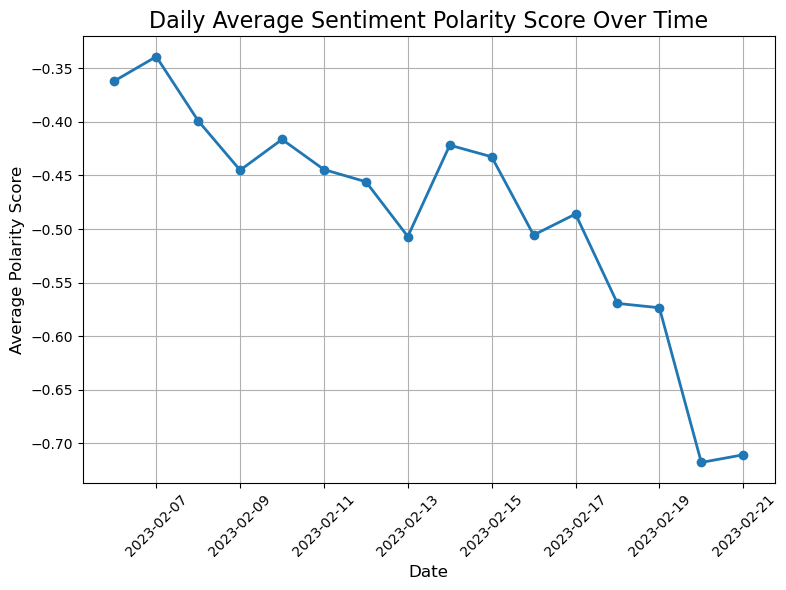

In [61]:
df["date"] = pd.to_datetime(df["date"])
daily_df = df.groupby(df["date"].dt.date)["sentiment_polarity"].mean()
plt.figure(figsize=(8, 6))
plt.plot(daily_df.index, daily_df.values, marker='o', linewidth=2)

plt.title("Daily Average Sentiment Polarity Score Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Polarity Score", fontsize=12)

plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

## Plotting Sentiment Anomalies

In [72]:
# Randomly sample 80 anomalies proportionally to the number of anomalies per day
def proportional_sample(df_anom, total_samples=80, date_col="date", random_state=42):
    """
    Proportionally sample anomalies based on daily counts.
    """
    # Convert to day-only
    df_anom = df_anom.copy()
    df_anom["day"] = df_anom[date_col].dt.date

    # Count anomalies per day
    counts = df_anom["day"].value_counts().sort_index()

    # Compute proportional sample sizes
    proportions = counts / counts.sum()
    per_day_samples = (proportions * total_samples).round().astype(int)

    # Fix rounding mismatch by adjusting to exact total
    diff = total_samples - per_day_samples.sum()
    if diff != 0:
        # Add/subtract from days with maximum anomalies
        adjust_idx = per_day_samples.idxmax()
        per_day_samples.loc[adjust_idx] += diff

    # Perform sampling
    sampled_rows = []
    for day, n in per_day_samples.items():
        day_rows = df_anom[df_anom["day"] == day]
        if n > len(day_rows):
            n = len(day_rows)  # just in case
        sampled_rows.append(day_rows.sample(n=n, random_state=random_state))

    return pd.concat(sampled_rows)

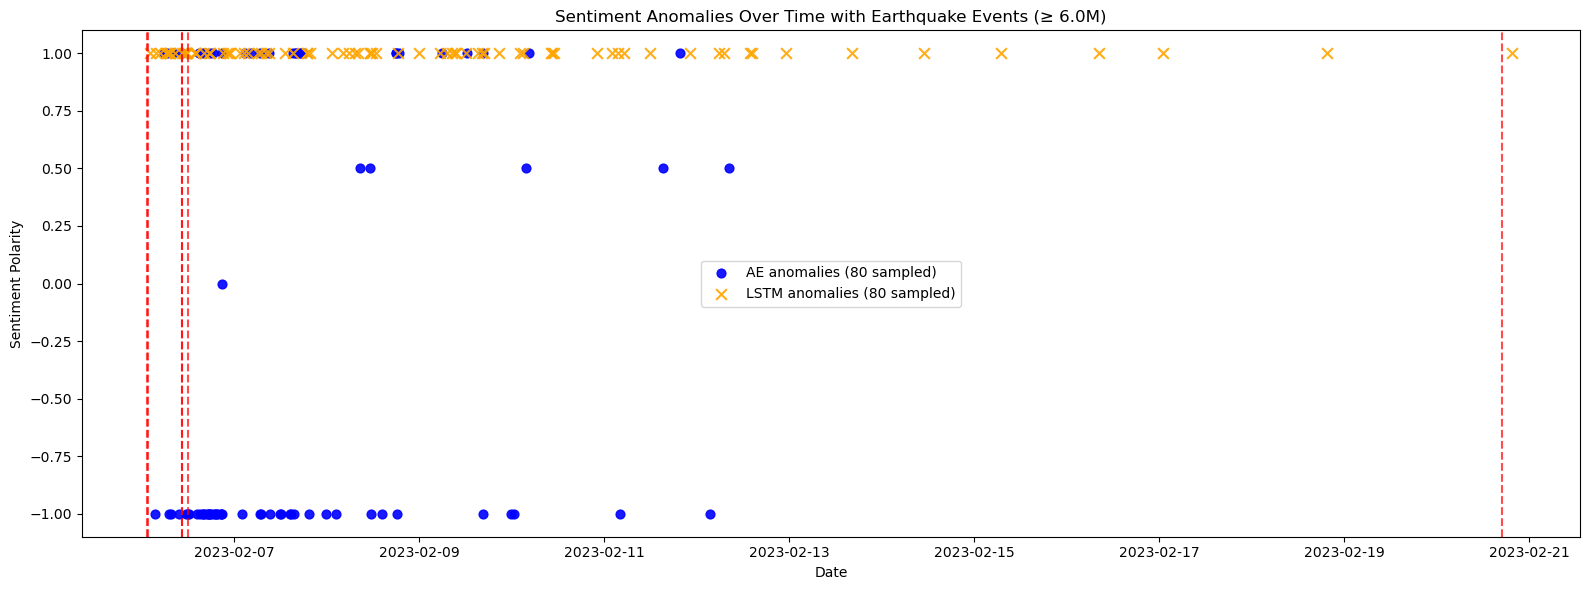

In [73]:

import matplotlib.pyplot as plt

df_sorted = df.sort_values("date").reset_index(drop=True)

ae_anom_df = df_sorted[df_sorted["autoencoder_is_anomaly"] == True]
lstm_anom_df = df_sorted[df_sorted["lstm_is_anomaly"] == True]

ae_sample = proportional_sample(ae_anom_df, total_samples=80, date_col="date")
lstm_sample = proportional_sample(lstm_anom_df, total_samples=80, date_col="date")


# -----------------------
# 2. Define earthquake events (>= 6.0 magnitude) and convert to datetime
# -----------------------

eq_times = {
    "M7.8": "2023-02-06 01:17",
    "M6.7": "2023-02-06 01:28",
    "M7.7": "2023-02-06 10:24",
    "M6.0": "2023-02-06 10:26",
    "M6.0 (noon)": "2023-02-06 12:02",
    "M6.3": "2023-02-20 17:04"
}
eq_times = {label: pd.to_datetime(ts) for label, ts in eq_times.items()}


plt.figure(figsize=(16, 6))


# Plot AE anomalies
plt.scatter(
    ae_sample["date"],
    ae_sample["sentiment_polarity"],
    color="blue",
    marker="o",
    s=40,
    alpha=0.9,
    label="AE anomalies (80 sampled)"
)

# Plot LSTM anomalies
plt.scatter(
    lstm_sample["date"],
    lstm_sample["sentiment_polarity"],
    color="orange",
    marker="x",
    s=60,
    alpha=0.9,
    label="LSTM anomalies (80 sampled)"
)

# -----------------------
# Earthquake vertical lines
# -----------------------
for label, ts in eq_times.items():
    plt.axvline(ts, color="red", linestyle="--", linewidth=1.5, alpha=0.7)


plt.xlabel("Date")
plt.ylabel("Sentiment Polarity")
plt.title("Sentiment Anomalies Over Time with Earthquake Events (≥ 6.0M)")
plt.legend()
plt.tight_layout()
plt.show()

## Autoencoder

In [63]:
# TBA

## LSTM with Attention

In [64]:
# TBA